In [21]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [58]:
#Function reads one single image from the data

#end defaults to 0. If 0, only 1 frame @ begin is read
#if both startIdx and endIdx are provIdxed and endIdx > startIdx, data includes startIdx, excludes endIdx: (startIdx, endIdx]

def getData(filename, dataset, startIdx, endIdx=0):
    if (endIdx == 0):
        endIdx = startIdx + 1; # since we will be returning only 1 frame
    
    if (startIdx > endIdx or startIdx < 0 or endIdx < 0): # starting has to be before ending
        print "Unable to read file. Ensure Starting index is lesser than Ending index. Both numbers should be positive integers"
        return None
    
    try:
        file = h5py.File(filename, 'r')   # 'r' means that hdf5 file is open in read-only mode
    except Exception as e:
        print("Problem in file reading {}".format(e));
        file.close();
        return None;
        
    #ensure we are reading within valIdx bounds
    if (startIdx >= file[dataset].shape[2] or endIdx > file[dataset].shape[2]):
        print 'Index out of bounds when reading file {}. Max size is {}'.format(filename, file[dataset].shape[2]);
        file.close();
        return None
            
    #shape of data is (100, 100, n_frames)
    #we need to transpose to be able to read and plot (just for ease)
    print file[dataset].shape[2]
    data = file[dataset][:, :, startIdx : endIdx];
    file.close();
    return data#.transpose(2, 0, 1)
    

##Function to display the grid map as image
#params: single frame,a 2d image
#       bool flag to save a image as temp.png
def showData(img, saveImg = False, fileName = None):
    if (img is not None):
        plt.imshow(img, cmap='Greys_r')
        if (saveImg):
            im = Image.fromarray(img)
            if (fileName is not None):
                im.save(fileName)
            else:
                im.save('temp.png')

1000000


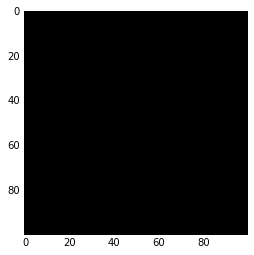

In [60]:
GT = getData('data.h5', 'ground_truth', 999980, 1000000)
for i in range(0, 20):
    showData(GT[:, :, i], True, 'GT'+str(i)+'.png');


In [33]:
scans = getData('data.h5', 'occupancy', 0, 20)
#for i in range(0, 20):
#    showData(scans[:, :, i], True, 'temp_'+str(i)+'.png');

1000000


In [27]:
g = GT[26, 41, 0]
s = scans[26, 41, :]

In [28]:
s

array([255, 127, 127, 127, 127, 127,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0], dtype=uint8)

In [36]:
np.array_equal(GT[:, :, 0], GT[:, :, 2])

False

In [37]:
GT[:, :, 0] == GT[:, :, 2]

array([[False, False,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ..., 
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]], dtype=bool)

In [38]:
GT[0,0,0]

0

In [39]:
GT[0,0,2]

255